## First step: ***Reading the data***

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/Noorpr/myprojects/refs/heads/main/data/Obesity%20prediction.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Second Step: ***Describe the data***

In [33]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [34]:
df.describe(include=['O'])

,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [36]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [37]:
for column in df.select_dtypes(include=['O']).columns:
    print(f'column name : {column}\ncolumn values : {df[column].unique()}\n')

column name : Gender
column values : ['Female' 'Male']

column name : family_history
column values : ['yes' 'no']

column name : FAVC
column values : ['no' 'yes']

column name : CAEC
column values : ['Sometimes' 'Frequently' 'Always' 'no']

column name : SMOKE
column values : ['no' 'yes']

column name : SCC
column values : ['no' 'yes']

column name : CALC
column values : ['no' 'Sometimes' 'Frequently' 'Always']

column name : MTRANS
column values : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

column name : Obesity
column values : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']



## Third Step: ***Cleaning the data***

In [38]:
duplicated = df[df.duplicated(keep='first')]
print(len(duplicated))

24


In [39]:
df = df.drop_duplicates()
df[df.duplicated(keep='first')]

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity


In [40]:
new_target = {'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Insufficient_Weight' : 0, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6}

df['target'] = df['Obesity'].map(new_target)
df[['target','Obesity']]

,target,Obesity
0,1,Normal_Weight
1,1,Normal_Weight
2,1,Normal_Weight
3,2,Overweight_Level_I
4,3,Overweight_Level_II
...,...,...
2106,6,Obesity_Type_III
2107,6,Obesity_Type_III
2108,6,Obesity_Type_III
2109,6,Obesity_Type_III


In [41]:
df = df.drop('Obesity', axis=1)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,2
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,6


## Forth Step: ***Visualize some key faetures from the data***

<Axes: >

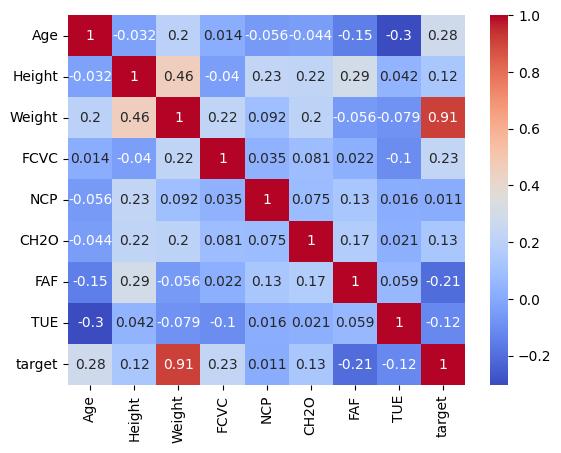

In [42]:
import seaborn as sns

correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

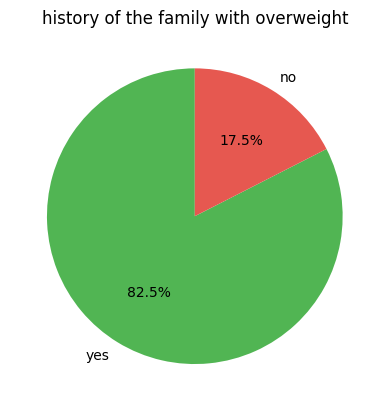

In [43]:
import matplotlib.pyplot as plt


plt.pie(df['family_history'].value_counts(),labels=df['family_history'].value_counts().index, autopct='%1.1f%%', colors=['#51b553', '#e65850'],startangle = 90)
plt.title('history of the family with overweight')
plt.show()

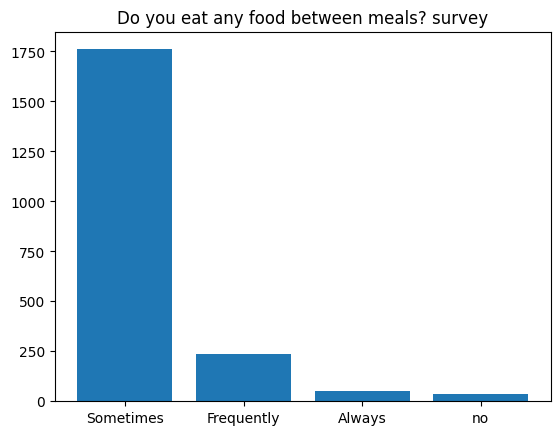

In [44]:
plt.bar(df['CAEC'].value_counts().index, df['CAEC'].value_counts())
plt.title('Do you eat any food between meals? survey')
plt.show()

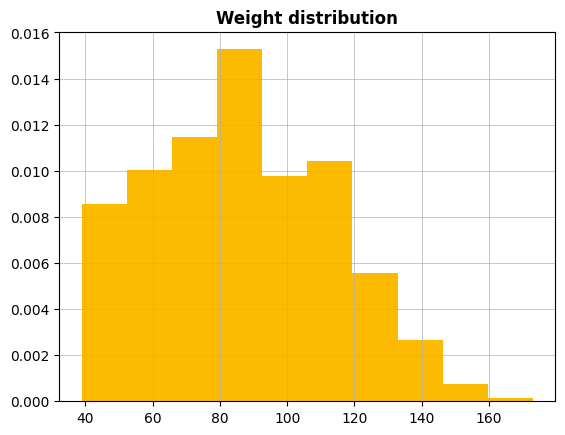

In [45]:
plt.hist(df['Weight'], density=True ,color='#fcba03')
plt.title('Weight distribution', fontweight='bold')
plt.grid(linewidth = 0.5)
plt.show()

## Fifth Step: ***Preprocess the data***

In [46]:
from sklearn.preprocessing import LabelEncoder

d_types = dict(df.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        df[name] = Le.fit_transform(df[name])

In [47]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3


## Sixth Step: ***Building the model***

In [48]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop('target', axis=1)



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1669, 16)
(418, 16)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

model = RandomForestClassifier(n_estimators=150)
rfecv = RFECV(model, step = 1, min_features_to_select= 4, n_jobs=-1)
rfecv.fit(X_train, y_train)

RFECV(estimator=RandomForestClassifier(n_estimators=150),
      min_features_to_select=4, n_jobs=-1)

In [51]:
rfecv.support_

array([False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [52]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'target'],
      dtype='object')

In [53]:
selected_features = pd.DataFrame({'column' : X_train.columns, 'Selected?' : rfecv.support_})
selected_features

,column,Selected?
0,Gender,False
1,Age,True
2,Height,True
3,Weight,True
4,family_history,False
5,FAVC,False
6,FCVC,True
7,NCP,False
8,CAEC,False
9,SMOKE,False


In [54]:
selected = np.where(rfecv.support_)[0]
X_train = X_train.iloc[:, selected]
X_test = X_test.iloc[:, selected]

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [56]:
from sklearn.metrics import accuracy_score

predicted = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predicted):.1%}')

Accuracy: 97.1%


## Finally: ***Checking the final result***

In [57]:
reverse_mapping = {v:k for k, v in new_target.items()}
reverse_mapping

{1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3: 'Overweight_Level_II',
 4: 'Obesity_Type_I',
 0: 'Insufficient_Weight',
 5: 'Obesity_Type_II',
 6: 'Obesity_Type_III'}

In [58]:
predictions = pd.Series(predicted)
predictions = predictions.map(reverse_mapping)

In [59]:
predictions

0      Overweight_Level_II
1           Obesity_Type_I
2         Obesity_Type_III
3          Obesity_Type_II
4      Insufficient_Weight
              ...         
413          Normal_Weight
414    Insufficient_Weight
415         Obesity_Type_I
416    Overweight_Level_II
417     Overweight_Level_I
Length: 418, dtype: object

In [60]:
y_test = pd.Series(y_test)
y_test = y_test.map(reverse_mapping)

In [61]:
result = pd.DataFrame({'Actual' : np.array(y_test), 'Predicted' : np.array(predictions)})
result

,Actual,Predicted
0,Overweight_Level_II,Overweight_Level_II
1,Obesity_Type_I,Obesity_Type_I
2,Obesity_Type_III,Obesity_Type_III
3,Obesity_Type_II,Obesity_Type_II
4,Insufficient_Weight,Insufficient_Weight
...,...,...
413,Normal_Weight,Normal_Weight
414,Normal_Weight,Insufficient_Weight
415,Obesity_Type_I,Obesity_Type_I
416,Overweight_Level_II,Overweight_Level_II


In [62]:
result[~result.duplicated()]

,Actual,Predicted
0,Overweight_Level_II,Overweight_Level_II
1,Obesity_Type_I,Obesity_Type_I
2,Obesity_Type_III,Obesity_Type_III
3,Obesity_Type_II,Obesity_Type_II
4,Insufficient_Weight,Insufficient_Weight
5,Normal_Weight,Normal_Weight
6,Overweight_Level_I,Overweight_Level_I
35,Normal_Weight,Insufficient_Weight
85,Normal_Weight,Overweight_Level_I
159,Insufficient_Weight,Normal_Weight


In [67]:
X_train.head()

,Age,Height,Weight,FCVC
60,21.000000,1.550000,49.000000,2.000000
233,34.000000,1.680000,77.000000,3.000000
63,22.000000,1.680000,55.000000,2.000000
1632,28.992809,1.909105,129.874864,2.206119
58,17.000000,1.650000,67.000000,3.000000


In [66]:
import joblib

joblib.dump(model, 'obesity_model.pkl')

['obesity_model.pkl']